In [26]:
import pandas as pd
import seaborn as sb
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv('cardio.csv')

In [4]:
df.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,4,48,F,156,56.0,23.0,100,60,N,N,0,0,0,0


In [5]:
df.isnull().sum()

id        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
AP_HI     0
AP_LO     0
Chol      0
Gluc      0
Smoke     0
Alco      0
Active    0
Cardio    0
dtype: int64

In [6]:
#change categorical to numeric

df['Chol']=df['Chol'].replace(['N','B','H'],[0,1,2]) 
df['Gluc']=df['Gluc'].replace(['N','B','H'],[0,1,2])
df['Gender']=df['Gender'].replace(['M','F'],[0,1])

In [7]:
df.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,0,168,62.0,22.0,110,80,0,0,0,0,1,0
1,1,55,1,156,85.0,34.9,140,90,2,0,0,0,1,1
2,2,52,1,165,64.0,23.5,130,70,2,0,0,0,0,1
3,3,48,0,169,82.0,28.7,150,100,0,0,0,0,1,1
4,4,48,1,156,56.0,23.0,100,60,0,0,0,0,0,0


In [8]:
y =df['Cardio']
x =df.drop(['Cardio'],axis=1)
x =x.drop(['id'],axis=1)

df2= df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] #tried remove outliers , x2,y2 df with removed ouliers
y2 =df2['Cardio']
x2 =df2.drop(['Cardio'],axis=1)
x2 =x2.drop(['id'],axis=1)


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

train Classification report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75     26412
           1       0.77      0.66      0.71     26088

    accuracy                           0.73     52500
   macro avg       0.74      0.73      0.73     52500
weighted avg       0.74      0.73      0.73     52500

train accuracy: 0.7326095238095238
test Classification report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      8609
           1       0.78      0.66      0.71      8891

    accuracy                           0.73     17500
   macro avg       0.74      0.73      0.73     17500
weighted avg       0.74      0.73      0.73     17500

test accuracy : 0.7318285714285714


<AxesSubplot:>

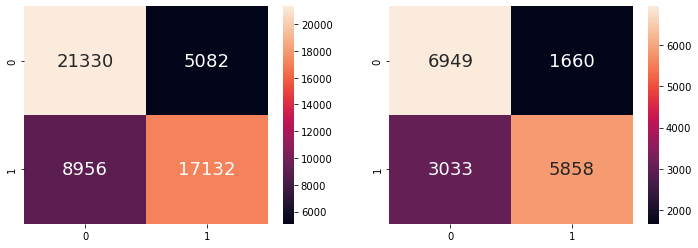

In [10]:
#n_estimators = number of trees used, 
#these two parameters keep the test accuracy around the same level while reducing overfitting

rf_Model=RandomForestClassifier(n_estimators=50,max_depth=6)#,bootstrap=False) 
rf_Model.fit(x_train,y_train)
y_train_pred=rf_Model.predict(x_train)
y_test_pred=rf_Model.predict(x_test)

print('With outliers random tree')
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print('train accuracy:',accuracy_score(y_train,y_train_pred))

print('test Classification report:\n',classification_report(y_test,y_test_pred))
print('test accuracy :',accuracy_score(y_test,y_test_pred))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


Without outliers Random Tree:
train Classification report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76     21458
           1       0.77      0.65      0.71     20245

    accuracy                           0.74     41703
   macro avg       0.74      0.74      0.74     41703
weighted avg       0.74      0.74      0.74     41703

train accuracy: 0.7384121046447498
test Classification report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.76      7199
           1       0.77      0.65      0.71      6702

    accuracy                           0.74     13901
   macro avg       0.74      0.73      0.73     13901
weighted avg       0.74      0.74      0.74     13901

test accuracy : 0.7376447737572837


<AxesSubplot:>

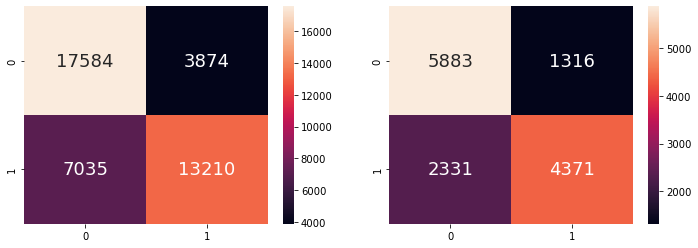

In [15]:

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.25,random_state=1)

#these two parameters keep the test accuracy around the same level while reducing overfitting

rf_Model=RandomForestClassifier(n_estimators=80,max_depth=8)#,bootstrap=False) 
rf_Model.fit(x2_train,y2_train)
y2_train_pred=rf_Model.predict(x2_train)
y2_test_pred=rf_Model.predict(x2_test)

print('Without outliers Random Tree:')
print('train Classification report:\n',classification_report(y2_train,y2_train_pred))
print('train accuracy:',accuracy_score(y2_train,y2_train_pred))

print('test Classification report:\n',classification_report(y2_test,y2_test_pred))
print('test accuracy :',accuracy_score(y2_test,y2_test_pred))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y2_train, y2_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y2_test, y2_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [104]:
#press stop if accidentally ran
# Finding best hyper parameter for neural network for dataset with outliers

MLP=MLPClassifier(max_iter=500)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (10,10,10), (30,30,30),(20,20,20),(40,40,40),(100,100,100),(10,10),(20,20),(30,30),(40,40),(50,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'solver': 'adam'}
0.715 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.728 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.705 (+/-0.033) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'sgd'}
0.726 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}
0.710 (+/-0.020) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'solver': 'sgd'}
0.727 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'solver': 'adam'}
0.715 (+/-0.022) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20), 'solver': 'sgd'}
0.727 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes'

With outliers neural network
train Classification report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73     26412
           1       0.72      0.74      0.73     26088

    accuracy                           0.73     52500
   macro avg       0.73      0.73      0.73     52500
weighted avg       0.73      0.73      0.73     52500

train accuracy: 0.7301142857142857
test Classification report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      8609
           1       0.73      0.74      0.74      8891

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500

test accuracy : 0.7304571428571428


<AxesSubplot:>

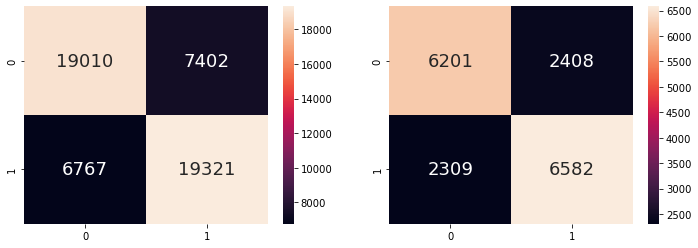

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’ // identity bad //30,30,30 1000 logistic gives 0.731
#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#alphafloat, default=0.0001
#best para found {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'solver': 'adam'}

MLP=MLPClassifier(hidden_layer_sizes=(20,20),max_iter=500,activation='logistic') 
MLP.fit(x_train,y_train.values.ravel())
y_train_pred=MLP.predict(x_train)
y_test_pred=MLP.predict(x_test)
print('With outliers neural network')
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print('train accuracy:',accuracy_score(y_train,y_train_pred))

print('test Classification report:\n',classification_report(y_test,y_test_pred))
print('test accuracy :',accuracy_score(y_test,y_test_pred))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [107]:
#press stop if accidentally ran
# Finding best hyper parameter for neural network for dataset without outliers
MLP=MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (10,10,10), (30,30,30),(20,20,20),(40,40,40),(100,100,100),(10,10),(20,20),(30,30),(40,40),(50,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=3)
clf.fit(x2_train, y2_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}
0.622 (+/-0.194) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.714 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.514 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'sgd'}
0.722 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}
0.619 (+/-0.189) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'solver': 'sgd'}
0.718 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'solver': 'adam'}
0.613 (+/-0.144) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20), 'solver': 'sgd'}
0.720 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes'

Without outliers neural network
train Classification report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76     21458
           1       0.77      0.62      0.69     20245

    accuracy                           0.73     41703
   macro avg       0.74      0.72      0.72     41703
weighted avg       0.73      0.73      0.72     41703

train accuracy: 0.7278133467616239
test Classification report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76      7199
           1       0.77      0.63      0.69      6702

    accuracy                           0.73     13901
   macro avg       0.74      0.73      0.73     13901
weighted avg       0.74      0.73      0.73     13901

test accuracy : 0.7323214157254874


<AxesSubplot:>

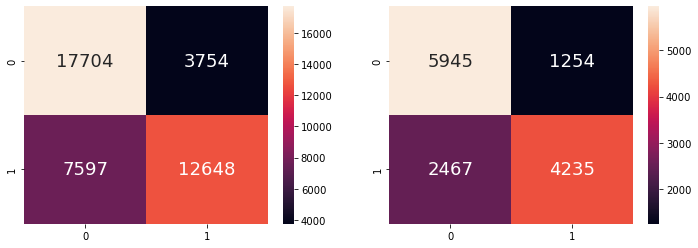

In [116]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.25,random_state=1)

#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’ // identity bad //30,30,30 1000 logistic gives 0.731
#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#alphafloat, default=0.0001

#0.727 (+/-0.006) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'solver': 'adam'} best for 500 iterations
#0.727 (+/-0.008) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'} best for 1000 iterations

MLP=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000) 
MLP.fit(x2_train,y2_train.values.ravel())
y2_train_pred=MLP.predict(x2_train)
y2_test_pred=MLP.predict(x2_test)
print('Without outliers neural network')
print('train Classification report:\n',classification_report(y2_train,y2_train_pred))
print('train accuracy:',accuracy_score(y2_train,y2_train_pred))

print('test Classification report:\n',classification_report(y2_test,y2_test_pred))
print('test accuracy :',accuracy_score(y2_test,y2_test_pred))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y2_train, y2_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y2_test, y2_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])